# Concatenate and qualify data retrieved from PNBOIA website by BROOU
Author: Henrique P P Pereira

In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

In [3]:
pathname = os.environ['HOME'] + '/Dropbox/database/pnboia/chm/'

buoys = os.listdir(pathname)
buoys

['san', 'rcf', 'rig', 'psg', 'vix', 'fln']

In [4]:
#function to plots Hs, Tp and Dp

def hstpdp(tit, date, hs, hmax, tp, dp):

    fig = plt.figure(figsize=(12,10))
    ax1 = fig.add_subplot(311)
    ax1.plot(date, hs, '.b')
    ax1.plot(date, hmax, '.r')
    ax1.set_ylim(0,6)
    ax1.set_title(tit)
    ax2 = fig.add_subplot(312)
    ax2.plot(date, tp, '.b')
    ax2.set_ylim(0,20)
    ax3 = fig.add_subplot(313)
    ax3.plot(date, dp, '.b')
    ax3.set_ylim(0,360)

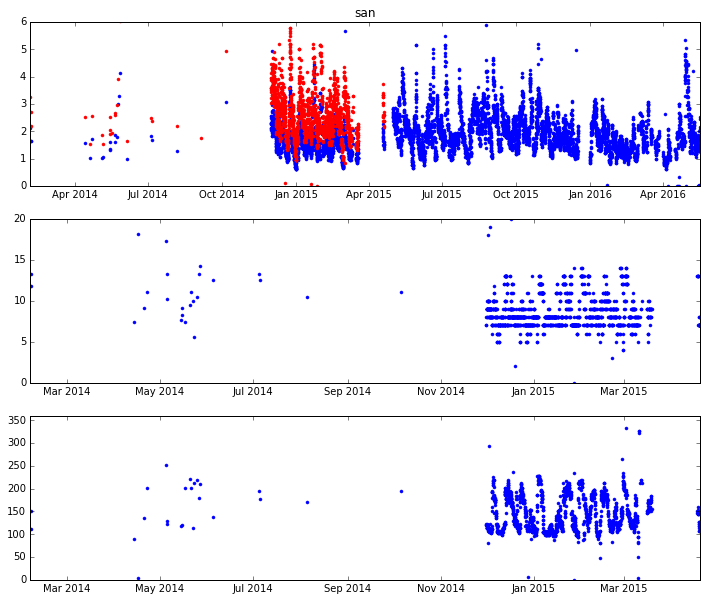

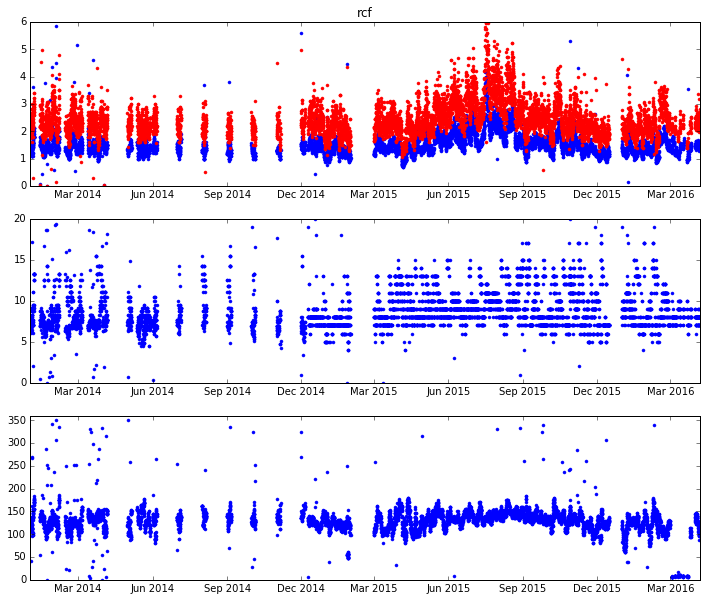

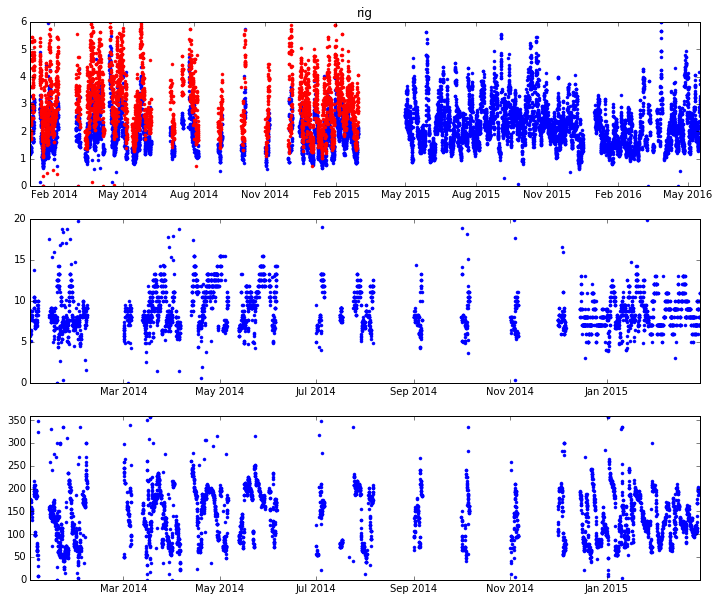

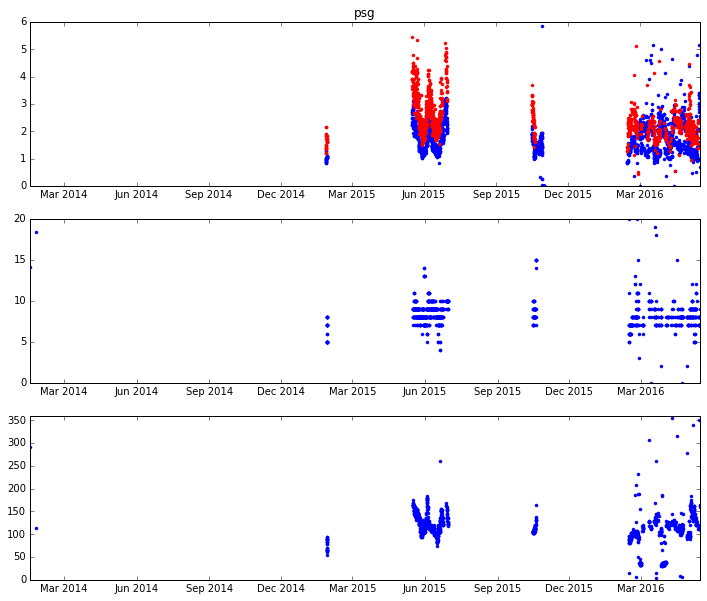

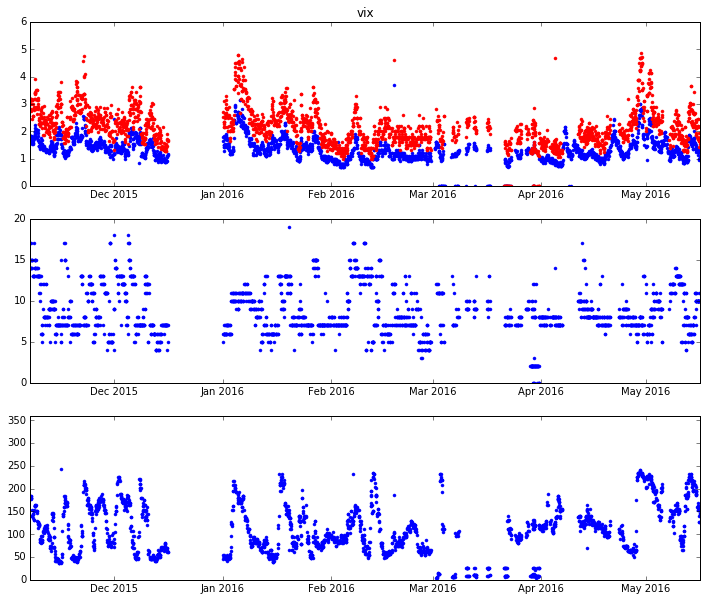

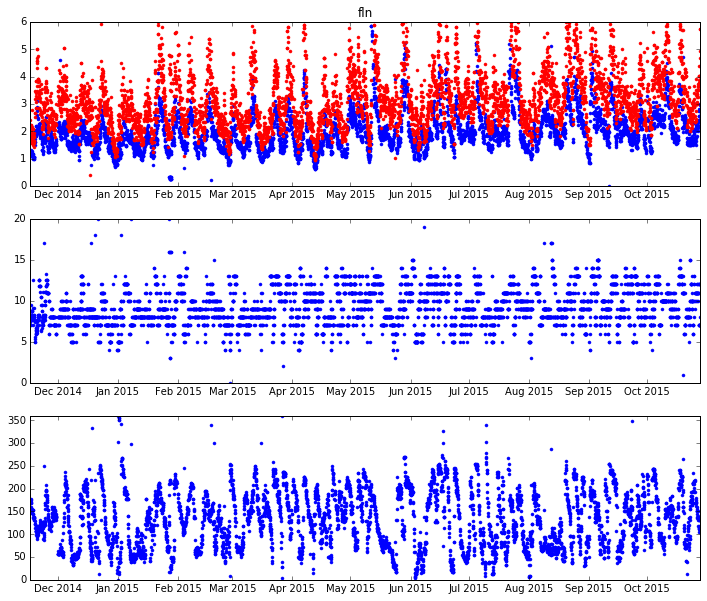

In [6]:
#read data from each buoy, concatenate and save as dataframe

for buoy in buoys:
    
    dd = pd.DataFrame()
    
    files = np.sort(os.listdir(pathname + buoy))
    
    for f in files:
        
        dd1 = pd.read_csv(pathname + buoy + '/' + f, parse_dates=True, index_col='time')
        
        dd = pd.concat([dd, dd1])
        
    #change 'xxx' to nan
    dd.ix[np.where(np.array(dd) == 'xxx')] = np.nan
    dd.ix[np.where(np.array(dd) == 'xxxx')] = np.nan
    dd.ix[np.where(np.array(dd) == 'XXXX')] = np.nan
    
    

    #save files
    #dd.to_csv('out/' + buoy + '.csv')
        
    #plot
    hstpdp(buoy, dd.index, dd.wave_hs, dd.wave_hs_max, dd.wave_tp, dd.wave_dir)

In [65]:
dd.columns

Index([u'air_temp', u'argos_id', u'dew_point', u'humidity', u'pressure',
       u'sst', u'wave_dir', u'wave_hs', u'wave_hs_max', u'wave_tp'],
      dtype='object')